<a href="https://colab.research.google.com/github/Baidunafter/university/blob/main/Tasks/%D0%94%D0%9F%D0%9E_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963_%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D1%80%D0%B0%D1%81%D1%82%D1%80%D0%BE%D0%B2%D1%8B%D0%BC%D0%B8_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D0%BC%D0%B8_%D0%B2_Rasterio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №3. Работа с растровыми данными в Rasterio**

---

**Данные для обработки:**

- Одноканальное изображение (ЦМР): https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif
- Мультиспектральное изображение (Landsat): https://github.com/opengeos/datasets/releases/download/raster/cog.tif

### **Задание 1. Чтение и исследование растровых данных**



1. Откройте одноканальное изображение ЦМР с использованием `rasterio`.


In [188]:
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt

raster_path_dem = "https://github.com/opengeos/datasets/releases/download/raster/dem_90m.tif"

src_dem = rasterio.open(raster_path_dem)


2. Извлеките и выведите метаданные растра, включая СК, разрешение, границы, количество каналов и типы данных.


In [189]:
print("Метаданные ЦМР:")
print(src_dem.meta)
print("Система координат (CRS):", src_dem.crs)
print("Разрешение:", src_dem.res)
print("Границы:", src_dem.bounds)
print("Количество каналов:", src_dem.count)
print("Типы данных:", src_dem.dtypes)

Метаданные ЦМР:
{'driver': 'GTiff', 'dtype': 'int16', 'nodata': None, 'width': 4269, 'height': 3113, 'count': 1, 'crs': CRS.from_wkt('PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]'), 'transform': Affine(90.0, 0.0, -13442488.3428,
       0.0, -89.99579177642138, 4668371.5775)}
Система координат (CRS): EPSG:3857
Разрешение: (90.0, 89.99579177642138)
Границы: Bound

3. Отобразите ширину и высоту растра, а также типы данных пикселей, чтобы понять размеры сетки и структуру данных.

In [190]:
print("Ширина:", src_dem.width)
print("Высота:", src_dem.height)

Ширина: 4269
Высота: 3113


---



### **Задание 2. Визуализация и манипулирование растровыми каналами**



1. Визуализируйте одноканальное изображение ЦМР с использованием пользовательской цветовой карты (например, cmap='terrain').


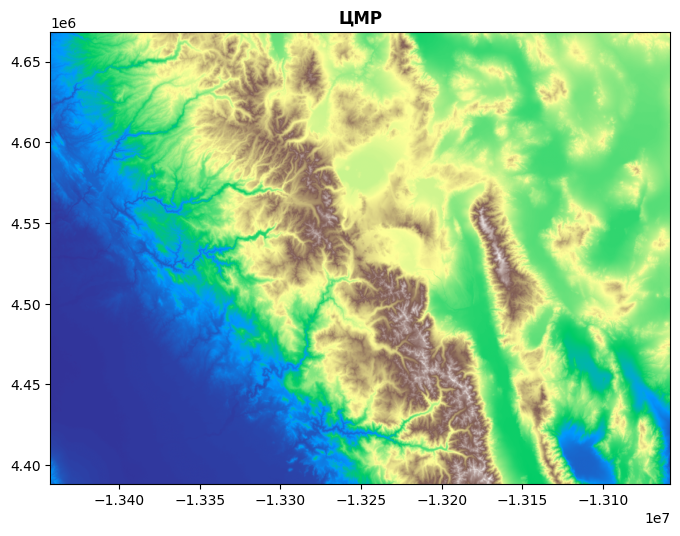

In [191]:
fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show(src_dem, cmap="terrain", ax=ax, title="ЦМР")
plt.show()

2. Откройте мультиспектральное изображение и визуализируйте первый канал с использованием подходящей цветовой карты.


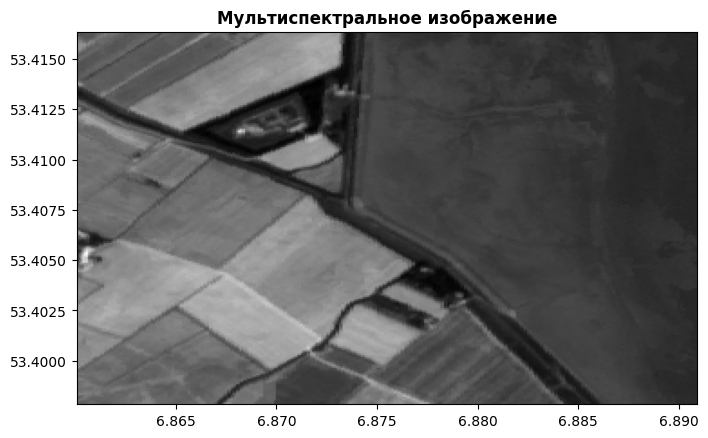

In [192]:
raster_path_ms = "https://github.com/opengeos/datasets/releases/download/raster/cog.tif"
src_ms = rasterio.open(raster_path_ms)

fig, ax = plt.subplots(figsize=(8, 8))
rasterio.plot.show((src_ms, 1), cmap="gray", ax=ax, title="Мультиспектральное изображение")
plt.show()

3. Объедините несколько каналов из мультиспектрального изображения (например, Красный, Зеленый и Синий) и совместите их в один массив для создания RGB-композитного изображения.

488.0 2102.0
735.0 1960.0
913.5 2083.0


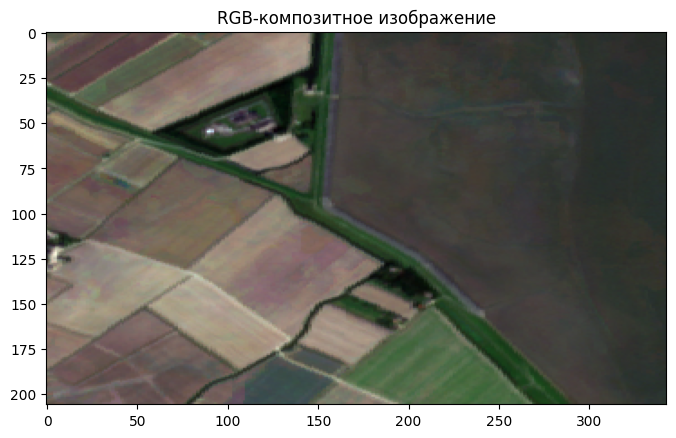

In [193]:
red_band = src_ms.read(1)
green_band = src_ms.read(2)
blue_band = src_ms.read(3)
nir_band = src_ms.read(4)

print(red_band.min(), red_band.max())
print(green_band.min(), green_band.max())
print(blue_band.min(), blue_band.max())

def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm

rgb = np.dstack((normalize(red_band), normalize(green_band), normalize(blue_band))).clip(0, 1)

plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("RGB-композитное изображение")
plt.show()

---



### **Задание 3. Обрезка растра с использованием индексации массива**



1. Откройте мультиспектральное изображение и обрежьте его с использованием спискового среза (указав диапазоны строк и столбцов).


In [194]:
data_ms = src_ms.read()
print(f"Исходное изображение: {data_ms.shape}")

subset = data_ms[:, 50:150, 100:250]
print(f"Обрезанное изображение: {subset.shape}")

Исходное изображение: (4, 206, 343)
Обрезанное изображение: (4, 100, 150)


2. Визуализируйте обрезанную часть изображения с использованием matplotlib, чтобы убедиться в корректном результате.


>*Примечание:*
>
> При работе с многоканальными растровыми изображениями, особенно в формате COG.TIFF (Cloud Optimized GeoTIFF), может возникнуть проблема с некорректным отображением псевдоцветного изображения. Это связано с тем, что разные каналы могут иметь различные диапазоны значений пикселей.
>
> Для корректной визуализации на шаге 2 необходимо применить нормализацию к каждому каналу перед отображением.



Включите следующую функцию в ваш код:

```python
# Функция для нормализации канала в диапазон от 0 до 1
def normalize(band):
    band_min = band.min()
    band_max = band.max()
    band_norm = (band - band_min) / (band_max - band_min)
    return band_norm
```

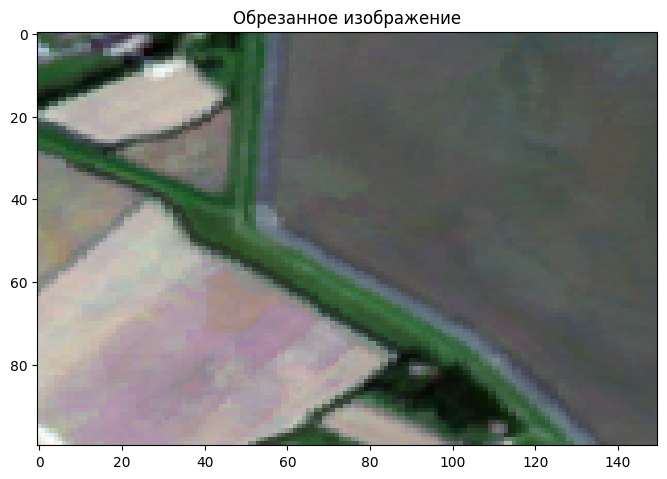

In [195]:
rgb_subset = np.dstack((normalize(subset[0]), normalize(subset[1]), normalize(subset[2])))

plt.figure(figsize=(8, 8))
plt.imshow(rgb_subset)
plt.title("Обрезанное изображение")
plt.show()

3. Сохраните обрезанное подмножество растра в новый файл с именем `clipped_multispectral.tif`.

In [196]:
from rasterio.transform import from_bounds

transform = src_ms.transform
left = transform.c + transform.a * 100
right = transform.c + transform.a * 250
top = transform.f + transform.e * 50
bottom = transform.f + transform.e * 150

new_transform = from_bounds(left, bottom, right, top, 150, 100)

output_path = "clipped_multispectral.tif"

with rasterio.open(
    output_path,
    "w",
    driver="GTiff",
    height=subset.shape[1],
    width=subset.shape[2],
    count=subset.shape[0],
    dtype=subset.dtype,
    crs=src_ms.crs,
    transform=new_transform,
    compress="lzw",
) as dst:
    dst.write(subset)

print(f"Обрезанный растр сохранен как: {output_path}")

Обрезанный растр сохранен как: clipped_multispectral.tif


---



### **Задание 4. Вычисление NDWI (калькуляция каналов)**



1. Откройте мультиспектральное изображение и извлеките каналы Green (Зеленый) и Ближний инфракрасный (NIR).


In [197]:
# Ваш код

2. Вычислите Нормализованный разностный водный индекс ([NDWI](https://en.wikipedia.org/wiki/Normalized_difference_water_index)) по формуле:

    NDWI = (Green - NIR) / (Green + NIR)

In [198]:
n_green_band = normalize(green_band)
n_nir_band = normalize(nir_band)
ndwi = (n_green_band - n_nir_band) / (n_green_band + n_nir_band)

3. Визуализируйте результат NDWI с использованием цветовой карты, подходящей для воды (например, cmap='Blues'), чтобы выделить водные объекты.


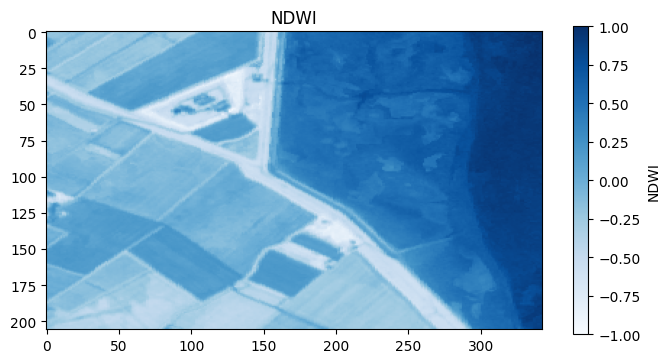

In [199]:
plt.figure(figsize=(8, 8))
plt.imshow(ndwi, cmap="Blues")
plt.colorbar(label="NDWI", shrink=0.5)
plt.title("NDWI")
plt.show()



4. Сохраните полученное изображение NDWI как новый растровый файл с именем ndwi.tif.

In [200]:
profile = src_ms.profile

profile.update(dtype=rasterio.float32, count=1, compress="lzw")

output_ndwi_path = "ndwi.tif"

with rasterio.open(output_ndwi_path, "w", **profile) as dst:
    dst.write(ndwi.astype(rasterio.float32), 1)

print(f"Растр NDWI сохранен как: {output_ndwi_path}")

Растр NDWI сохранен как: ndwi.tif


---



### **Задание 5. Перепроецирование растровых данных**



1. Перепроецируйте одноканальный растр ЦМР из его исходной СК в EPSG:4326 (WGS 84) с использованием функции `rasterio.warp.reproject`.


In [201]:
# Импортируем необходимые функции для перепроецирования растра
from rasterio.warp import calculate_default_transform, reproject, Resampling

# Задаем пути к файлам и целевую систему координат
dst_crs = "EPSG:4326"
output_reprojected_path = "reprojected_dem.tif"

# Открываем исходный растр и вычисляем параметры трансформации
with rasterio.open(raster_path_dem) as src:
    # Рассчитываем параметры трансформации для новой проекции
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds
    )

    # Копируем и обновляем метаданные для нового файла
    profile = src.profile
    profile.update(crs=dst_crs, transform=transform, width=width, height=height)

    # Создаем новый файл и перепроецируем данные
    with rasterio.open(output_reprojected_path, "w", **profile) as dst:
        # Перепроецируем каждый канал растра
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest, # Используем метод ближайшего соседа
            )

# Выводим сообщение об успешном сохранении
print(f"Перепроецированный растр сохранен как: {output_reprojected_path}")

Перепроецированный растр сохранен как: reprojected_dem.tif


2. Сохраните перепроецированный растр в новый файл GeoTIFF с именем `reprojected_dem.tif`.


In [202]:
# Ваш код

3. Визуализируйте как исходный, так и перепроецированный наборы данных ЦМР, чтобы сравнить, как перепроецирование влияет на пространственное покрытие и разрешение.

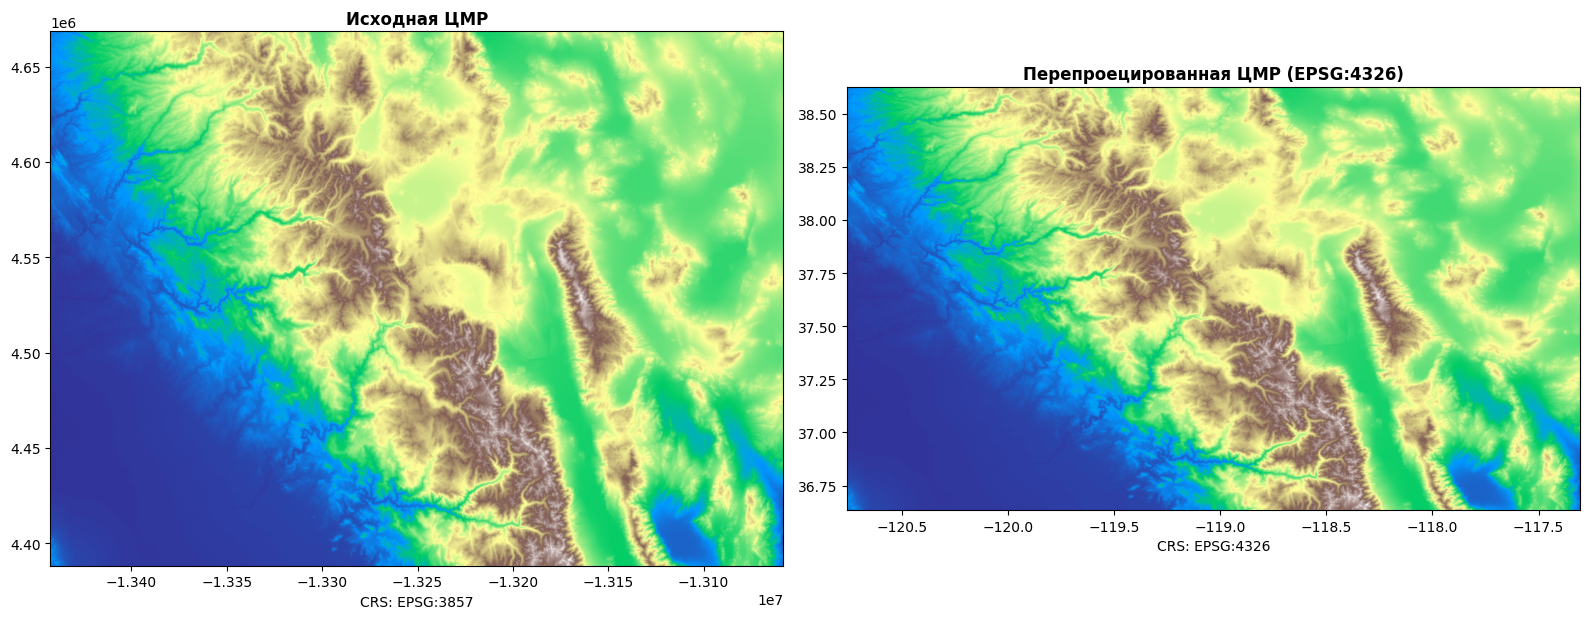

Исходное разрешение: (90.0, 89.99579177642138)
Перепроецированное разрешение: (0.0007543273324700005, 0.0007543273324700005)
Исходные границы: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)
Перепроецированные границы: BoundingBox(left=-120.75592734935736, bottom=36.63399062180265, right=-117.30487980330712, top=38.62692343418839)


In [203]:
src_reprojected = rasterio.open(output_reprojected_path)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

rasterio.plot.show(src_dem, cmap="terrain", ax=axes[0], title="Исходная ЦМР")
axes[0].set_xlabel(f"CRS: {src_dem.crs}")

rasterio.plot.show(src_reprojected, cmap="terrain", ax=axes[1], title="Перепроецированная ЦМР (EPSG:4326)")
axes[1].set_xlabel(f"CRS: {src_reprojected.crs}")

plt.tight_layout()
plt.show()

print(f"Исходное разрешение: {src_dem.res}")
print(f"Перепроецированное разрешение: {src_reprojected.res}")
print(f"Исходные границы: {src_dem.bounds}")
print(f"Перепроецированные границы: {src_reprojected.bounds}")

---